# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sat Mar  7 18:35:05 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


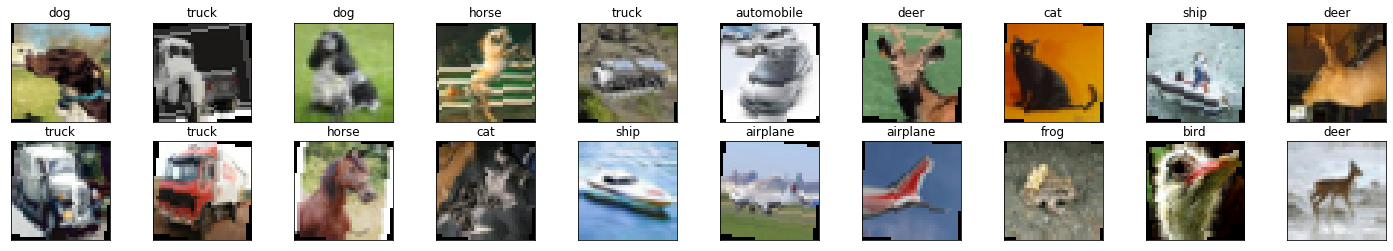

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,056
DepthwiseSeparableConv2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 30, 30]          18,432
      BatchNorm2d-12           [-1, 64, 30, 30]             128
             ReLU-13           [-1, 64, 30, 30]               0
          Dropout-14        

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.1, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.3613104820251465 Batch_id=390 Accuracy=44.75: 100%|██████████| 391/391 [00:28<00:00, 13.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5178/10000 (51.78%)

Validation accuracy increased (0.000000 --> 51.780000).  Saving model ...
Learning rate = 0.1  for epoch:  2
EPOCH: 2


Loss=1.1230891942977905 Batch_id=390 Accuracy=60.48: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6015/10000 (60.15%)

Validation accuracy increased (51.780000 --> 60.150000).  Saving model ...
Learning rate = 0.1  for epoch:  3
EPOCH: 3


Loss=1.163546085357666 Batch_id=390 Accuracy=66.32: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6398/10000 (63.98%)

Validation accuracy increased (60.150000 --> 63.980000).  Saving model ...
Learning rate = 0.1  for epoch:  4
EPOCH: 4


Loss=0.6478004455566406 Batch_id=390 Accuracy=70.32: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7093/10000 (70.93%)

Validation accuracy increased (63.980000 --> 70.930000).  Saving model ...
Learning rate = 0.1  for epoch:  5
EPOCH: 5


Loss=0.9064979553222656 Batch_id=390 Accuracy=72.47: 100%|██████████| 391/391 [00:28<00:00, 13.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6866/10000 (68.66%)

Learning rate = 0.1  for epoch:  6
EPOCH: 6


Loss=0.7082825899124146 Batch_id=390 Accuracy=74.08: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6884/10000 (68.84%)

Validation accuracy increased (68.660000 --> 68.840000).  Saving model ...
Learning rate = 0.1  for epoch:  7
EPOCH: 7


Loss=0.8219372630119324 Batch_id=390 Accuracy=75.40: 100%|██████████| 391/391 [00:29<00:00, 13.45it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7376/10000 (73.76%)

Validation accuracy increased (68.840000 --> 73.760000).  Saving model ...
Learning rate = 0.1  for epoch:  8
EPOCH: 8


Loss=0.7583802342414856 Batch_id=390 Accuracy=76.52: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7505/10000 (75.05%)

Validation accuracy increased (73.760000 --> 75.050000).  Saving model ...
Learning rate = 0.1  for epoch:  9
EPOCH: 9


Loss=0.5336982011795044 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7753/10000 (77.53%)

Validation accuracy increased (75.050000 --> 77.530000).  Saving model ...
Learning rate = 0.1  for epoch:  10
EPOCH: 10


Loss=0.528720498085022 Batch_id=390 Accuracy=78.13: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7513/10000 (75.13%)

Learning rate = 0.1  for epoch:  11
EPOCH: 11


Loss=0.58156818151474 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7790/10000 (77.90%)

Validation accuracy increased (75.130000 --> 77.900000).  Saving model ...
Learning rate = 0.1  for epoch:  12
EPOCH: 12


Loss=0.4882093369960785 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7774/10000 (77.74%)

Epoch    12: reducing learning rate of group 0 to 1.0000e-02.
Learning rate = 0.010000000000000002  for epoch:  13
EPOCH: 13


Loss=0.5377533435821533 Batch_id=390 Accuracy=81.78: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8095/10000 (80.95%)

Validation accuracy increased (77.740000 --> 80.950000).  Saving model ...
Learning rate = 0.010000000000000002  for epoch:  14
EPOCH: 14


Loss=0.380105197429657 Batch_id=390 Accuracy=82.47: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8150/10000 (81.50%)

Validation accuracy increased (80.950000 --> 81.500000).  Saving model ...
Learning rate = 0.010000000000000002  for epoch:  15
EPOCH: 15


Loss=0.5132665634155273 Batch_id=390 Accuracy=82.90: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8160/10000 (81.60%)

Validation accuracy increased (81.500000 --> 81.600000).  Saving model ...
Learning rate = 0.010000000000000002  for epoch:  16
EPOCH: 16


Loss=0.4025997519493103 Batch_id=390 Accuracy=82.99: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8128/10000 (81.28%)

Epoch    16: reducing learning rate of group 0 to 1.0000e-03.
Learning rate = 0.0010000000000000002  for epoch:  17
EPOCH: 17


Loss=0.44958972930908203 Batch_id=390 Accuracy=83.30: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8155/10000 (81.55%)

Validation accuracy increased (81.280000 --> 81.550000).  Saving model ...
Learning rate = 0.0010000000000000002  for epoch:  18
EPOCH: 18


Loss=0.35916048288345337 Batch_id=390 Accuracy=83.32: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8180/10000 (81.80%)

Validation accuracy increased (81.550000 --> 81.800000).  Saving model ...
Learning rate = 0.0010000000000000002  for epoch:  19
EPOCH: 19


Loss=0.647969126701355 Batch_id=390 Accuracy=83.48: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8212/10000 (82.12%)

Validation accuracy increased (81.800000 --> 82.120000).  Saving model ...
Learning rate = 0.0010000000000000002  for epoch:  20
EPOCH: 20


Loss=0.5522962212562561 Batch_id=390 Accuracy=83.34: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8183/10000 (81.83%)

Learning rate = 0.0010000000000000002  for epoch:  21
EPOCH: 21


Loss=0.5710331797599792 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8188/10000 (81.88%)

Validation accuracy increased (81.830000 --> 81.880000).  Saving model ...
Epoch    21: reducing learning rate of group 0 to 1.0000e-04.
Learning rate = 0.00010000000000000003  for epoch:  22
EPOCH: 22


Loss=0.3739142119884491 Batch_id=390 Accuracy=83.71: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8186/10000 (81.86%)

Learning rate = 0.00010000000000000003  for epoch:  23
EPOCH: 23


Loss=0.6104787588119507 Batch_id=390 Accuracy=83.63: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8195/10000 (81.95%)

Validation accuracy increased (81.860000 --> 81.950000).  Saving model ...
Learning rate = 0.00010000000000000003  for epoch:  24
EPOCH: 24


Loss=0.5661206841468811 Batch_id=390 Accuracy=83.67: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8185/10000 (81.85%)

Epoch    24: reducing learning rate of group 0 to 1.0000e-05.
Learning rate = 1.0000000000000004e-05  for epoch:  25
EPOCH: 25


Loss=0.2966281771659851 Batch_id=390 Accuracy=83.71: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8186/10000 (81.86%)

Validation accuracy increased (81.850000 --> 81.860000).  Saving model ...
Learning rate = 1.0000000000000004e-05  for epoch:  26
EPOCH: 26


Loss=0.367912620306015 Batch_id=390 Accuracy=83.46: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8182/10000 (81.82%)

Learning rate = 1.0000000000000004e-05  for epoch:  27
EPOCH: 27


Loss=0.3813818097114563 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8182/10000 (81.82%)

Validation accuracy increased (81.820000 --> 81.820000).  Saving model ...
Epoch    27: reducing learning rate of group 0 to 1.0000e-06.
Learning rate = 1.0000000000000004e-06  for epoch:  28
EPOCH: 28


Loss=0.46713119745254517 Batch_id=390 Accuracy=83.65: 100%|██████████| 391/391 [00:34<00:00, 11.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8177/10000 (81.77%)

Learning rate = 1.0000000000000004e-06  for epoch:  29
EPOCH: 29


Loss=0.627015233039856 Batch_id=390 Accuracy=83.55: 100%|██████████| 391/391 [00:34<00:00, 11.45it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8177/10000 (81.77%)

Validation accuracy increased (81.770000 --> 81.770000).  Saving model ...
Learning rate = 1.0000000000000004e-06  for epoch:  30
EPOCH: 30


Loss=0.5477045774459839 Batch_id=390 Accuracy=83.66: 100%|██████████| 391/391 [00:34<00:00, 11.46it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8188/10000 (81.88%)

Validation accuracy increased (81.770000 --> 81.880000).  Saving model ...
Epoch    30: reducing learning rate of group 0 to 1.0000e-07.
Learning rate = 1.0000000000000005e-07  for epoch:  31
EPOCH: 31


Loss=0.7307141423225403 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8193/10000 (81.93%)

Validation accuracy increased (81.880000 --> 81.930000).  Saving model ...
Learning rate = 1.0000000000000005e-07  for epoch:  32
EPOCH: 32


Loss=0.5966142416000366 Batch_id=390 Accuracy=83.54: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8198/10000 (81.98%)

Validation accuracy increased (81.930000 --> 81.980000).  Saving model ...
Learning rate = 1.0000000000000005e-07  for epoch:  33
EPOCH: 33


Loss=0.6275880932807922 Batch_id=390 Accuracy=83.51: 100%|██████████| 391/391 [00:34<00:00, 11.29it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8171/10000 (81.71%)

Epoch    33: reducing learning rate of group 0 to 1.0000e-08.
Learning rate = 1.0000000000000005e-08  for epoch:  34
EPOCH: 34


Loss=0.6511252522468567 Batch_id=390 Accuracy=83.60: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s] 



Test set: Average loss: 0.0042, Accuracy: 8208/10000 (82.08%)

Validation accuracy increased (81.710000 --> 82.080000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000005e-08  for epoch:  35
EPOCH: 35


Loss=0.47766923904418945 Batch_id=390 Accuracy=83.56: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8186/10000 (81.86%)

Learning rate = 1.0000000000000005e-08  for epoch:  36
EPOCH: 36


Loss=0.4738403856754303 Batch_id=390 Accuracy=83.39: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8204/10000 (82.04%)

Validation accuracy increased (81.860000 --> 82.040000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  37
EPOCH: 37


Loss=0.4949513077735901 Batch_id=390 Accuracy=83.60: 100%|██████████| 391/391 [00:34<00:00, 11.31it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8175/10000 (81.75%)

Learning rate = 1.0000000000000005e-08  for epoch:  38
EPOCH: 38


Loss=0.3298439085483551 Batch_id=390 Accuracy=83.44: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8192/10000 (81.92%)

Validation accuracy increased (81.750000 --> 81.920000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  39
EPOCH: 39


Loss=0.4836466312408447 Batch_id=390 Accuracy=83.48: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8199/10000 (81.99%)

Validation accuracy increased (81.920000 --> 81.990000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  40
EPOCH: 40


Loss=0.341941773891449 Batch_id=390 Accuracy=83.34: 100%|██████████| 391/391 [00:34<00:00, 11.28it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8172/10000 (81.72%)

Learning rate = 1.0000000000000005e-08  for epoch:  41
EPOCH: 41


Loss=0.5486701726913452 Batch_id=390 Accuracy=83.46: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8198/10000 (81.98%)

Validation accuracy increased (81.720000 --> 81.980000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  42
EPOCH: 42


Loss=0.5589741468429565 Batch_id=390 Accuracy=83.63: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8201/10000 (82.01%)

Validation accuracy increased (81.980000 --> 82.010000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  43
EPOCH: 43


Loss=0.6214243769645691 Batch_id=390 Accuracy=83.60: 100%|██████████| 391/391 [00:34<00:00, 11.47it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8185/10000 (81.85%)

Learning rate = 1.0000000000000005e-08  for epoch:  44
EPOCH: 44


Loss=0.5685420036315918 Batch_id=390 Accuracy=83.48: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8180/10000 (81.80%)

Learning rate = 1.0000000000000005e-08  for epoch:  45
EPOCH: 45


Loss=0.6307604908943176 Batch_id=390 Accuracy=83.65: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8162/10000 (81.62%)

Learning rate = 1.0000000000000005e-08  for epoch:  46
EPOCH: 46


Loss=0.4460013806819916 Batch_id=390 Accuracy=83.61: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8186/10000 (81.86%)

Validation accuracy increased (81.620000 --> 81.860000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  47
EPOCH: 47


Loss=0.5810330510139465 Batch_id=390 Accuracy=83.47: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8195/10000 (81.95%)

Validation accuracy increased (81.860000 --> 81.950000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  48
EPOCH: 48


Loss=0.4610763490200043 Batch_id=390 Accuracy=83.46: 100%|██████████| 391/391 [00:34<00:00, 11.22it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8212/10000 (82.12%)

Validation accuracy increased (81.950000 --> 82.120000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  49
EPOCH: 49


Loss=0.3061821162700653 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [00:34<00:00, 11.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8191/10000 (81.91%)

Learning rate = 1.0000000000000005e-08  for epoch:  50
EPOCH: 50


Loss=0.5719286203384399 Batch_id=390 Accuracy=83.56: 100%|██████████| 391/391 [00:34<00:00, 11.28it/s] 



Test set: Average loss: 0.0042, Accuracy: 8192/10000 (81.92%)

Validation accuracy increased (81.910000 --> 81.920000).  Saving model ...
Learning rate = 1.0000000000000005e-08  for epoch:  51


In [14]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 79% (3075/3877)
Test Accuracy of automobile: 86% (3413/3930)
Test Accuracy of  bird: 61% (2463/4004)
Test Accuracy of   cat: 69% (2787/3985)
Test Accuracy of  deer: 84% (3356/3961)
Test Accuracy of   dog: 63% (2517/3949)
Test Accuracy of  frog: 88% (3497/3969)
Test Accuracy of horse: 81% (3192/3905)
Test Accuracy of  ship: 91% (3659/4004)
Test Accuracy of truck: 84% (3303/3916)

Test Accuracy (Overall): 79% (31262/39500)


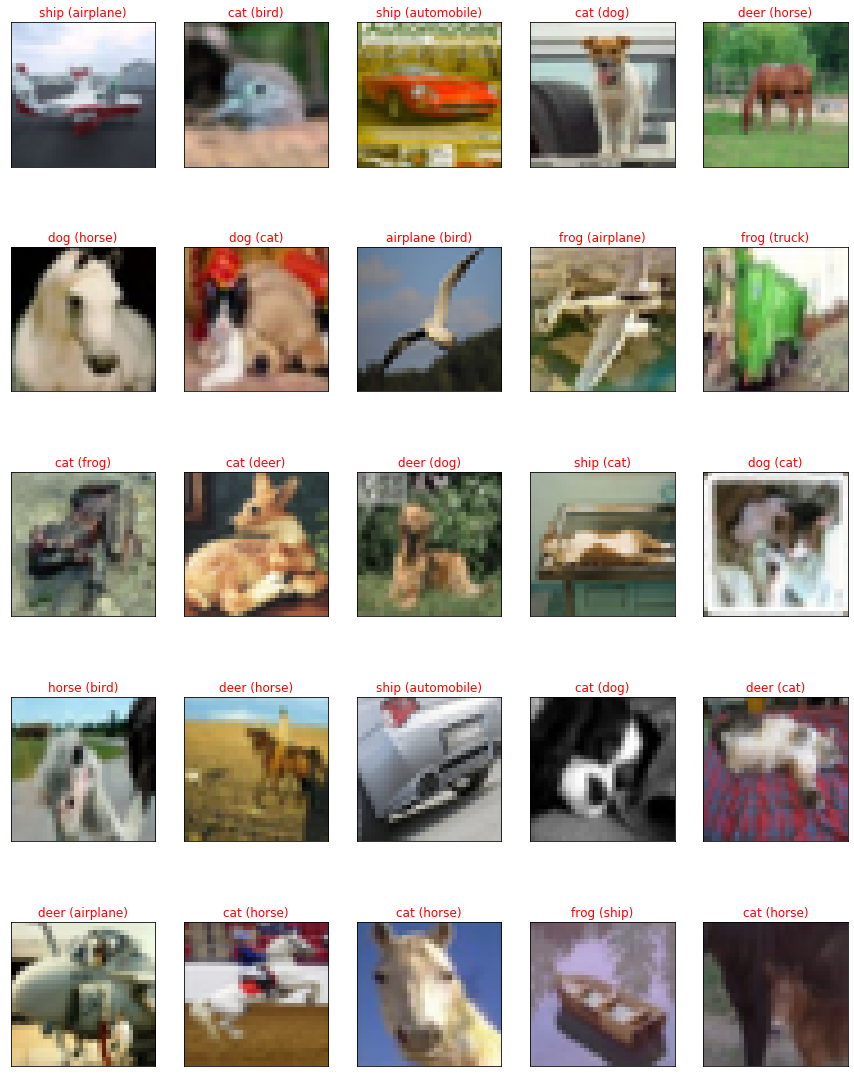

In [21]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

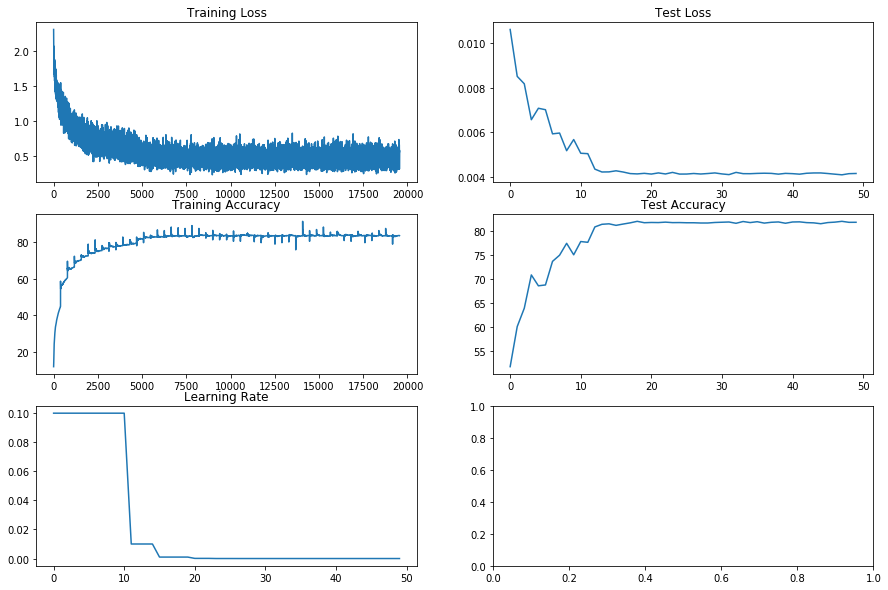

In [22]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [23]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)